In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
X_train = train_data.drop('Crop', axis=1)
y_train = train_data['Crop']
X_test = test_data.drop('Crop', axis=1)
y_test = test_data['Crop']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
svm = SVC(random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [5]:
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_scaled, y_train)
y_pred = best_svm.predict(X_test_scaled)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(best_svm, np.vstack((X_train_scaled, X_test_scaled)), np.hstack((y_train, y_test)), cv=5)

print(f'Accuracy: {accuracy}')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print(classification_report(y_test, y_pred))

Accuracy: 0.9352331606217616
Cross-validation scores: [0.94559585 0.94818653 0.96623377 0.95064935 0.94025974]
Mean CV accuracy: 0.9501850481125093
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.70      0.86      0.78        22
           3       1.00      1.00      1.00        23
           4       0.95      1.00      0.97        19
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        18
           8       0.73      1.00      0.84        16
           9       0.96      1.00      0.98        24
          10       0.70      1.00      0.82        14
          11       1.00      1.00      1.00        14
          12       0.94      1.00      0.97        16
          13       1.00      0.50      0.67        16
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      0.95      0.

In [7]:
print(confusion_matrix(y_test, y_pred))

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  3  0  1  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0 17  0  0

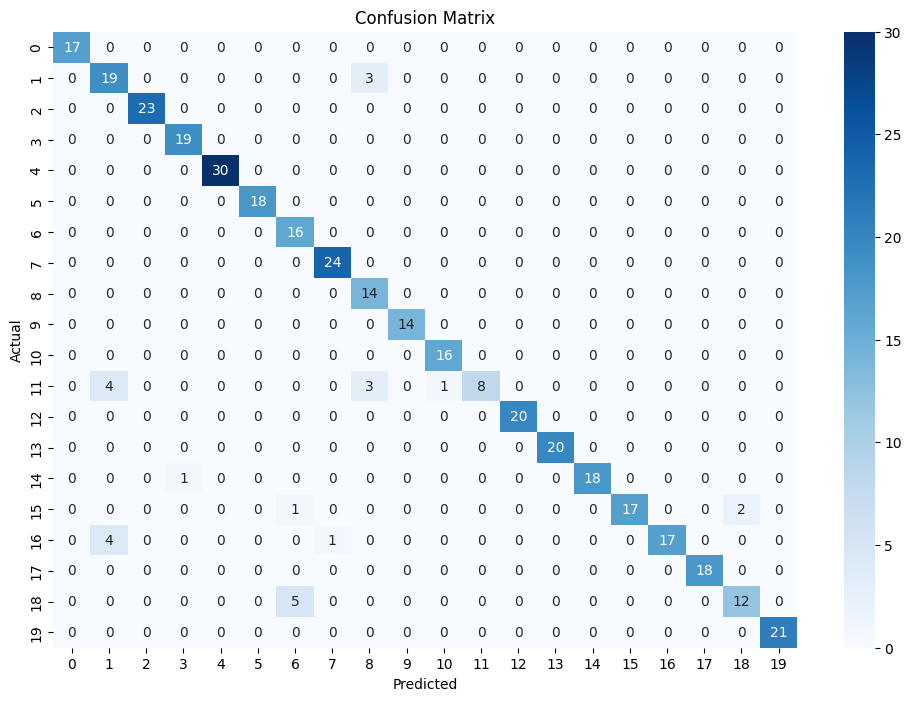

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()